# Module 0.2 : Fonctions d'une Variable
## Visualisations et Illustrations Interactives

Ce notebook illustre les concepts fondamentaux des fonctions d'une variable.

In [1]:
# Imports nécessaires
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de beaux graphiques
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. Fonctions Usuelles

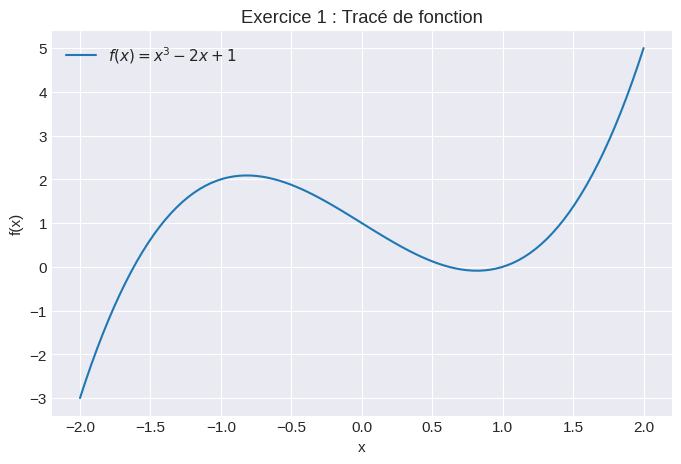

In [3]:
def f_exo1(x):
    # TODO: Définir la fonction f(x) = x^3 - 2x + 1
    return x**3 - 2*x + 1

# Création des x
# TODO: Créer un tableau de 100 points entre -2 et 2
x = np.linspace(-2, 2, 100)
y = f_exo1(x)

# Tracé
plt.figure(figsize=(8, 5))
# TODO: Tracer la courbe (x, y)
plt.plot(x, y, label='$f(x) = x^3 - 2x + 1$')
plt.title('Exercice 1 : Tracé de fonction')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

## 2. Limites et Formes Indéterminées

In [5]:
def g_exo2(x):
    # TODO: Implémenter (sqrt(1+x) - 1) / x
    return (np.sqrt(1+x) - 1) / x

# Valeurs proches de 0
# TODO: Définir des valeurs proches de 0 (ex: 0.1, 0.01, ...)
x_vals = np.array([0.1, 0.01, 0.001, 0.0001, -0.1, -0.01, -0.001, -0.0001]) # Example values close to 0
for val in x_vals:
    # Added a check to avoid division by zero if val is exactly 0, though x_vals are chosen to avoid it.
    if val != 0:
        print(f"g({val}) = {g_exo2(val):.6f}")
    else:
        print(f"g({val}) = Undefined")

# Limite théorique : 0.5

g(0.1) = 0.488088
g(0.01) = 0.498756
g(0.001) = 0.499875
g(0.0001) = 0.499988
g(-0.1) = 0.513167
g(-0.01) = 0.501256
g(-0.001) = 0.500125
g(-0.0001) = 0.500013


### 3. Limites Remarquables


Determiner les limites suivantes :
- $\displaystyle \lim_{x \to 0} \left( \frac{e^{3x + 2} - e^{2x}}{x} \right)$
- $\displaystyle \lim_{x \to 0} \frac{\cos x - 1}{x^3}$
- $\displaystyle \lim_{x \to 1} \frac{\ln(2 - x)}{x - 1}$
- $\displaystyle \lim_{x \to \frac{\pi}{2}} \frac{\exp(\cos x) - 1}{x - \frac{\pi}{2}}$



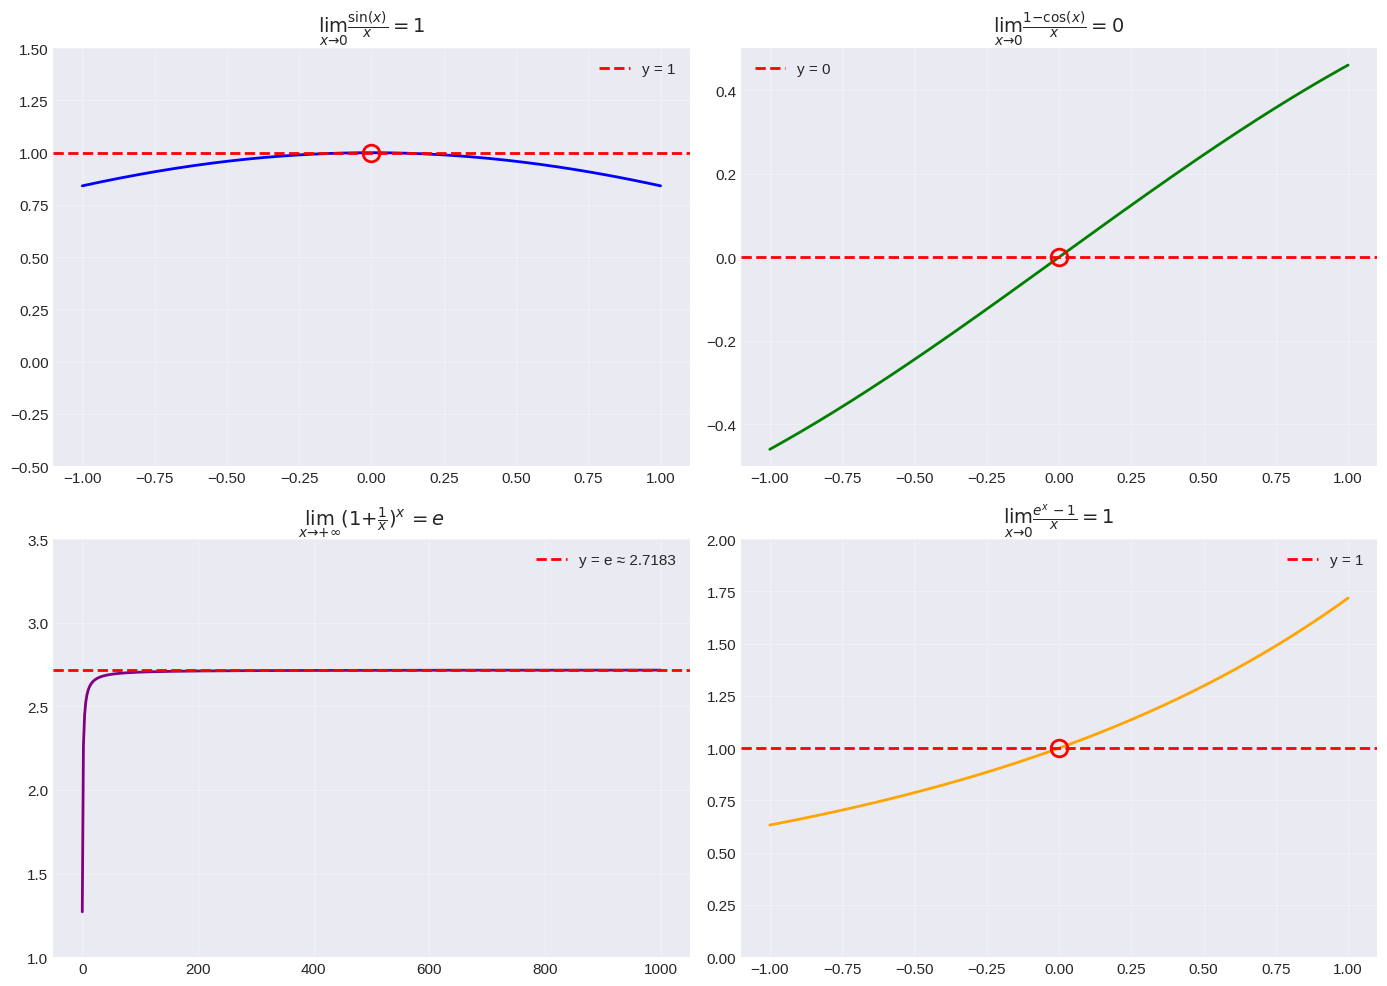


 Vérification numérique des limites remarquables:

sin(x)/x for x = 1e-09: 1.000000
(1-cos(x))/x for x = 1e-09: 0.000000
(1 + 1/x)^x for x = 1000000000.0: 2.718282
(e^x - 1)/x for x = 1e-09: 1.000000


In [8]:

# Visualisation des limites remarquables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define common x values for limits approaching 0
x_common = np.linspace(-1, 1, 400)
# Filter out 0 to avoid division by zero before applying np.nan_to_num
x_common_no_zero = x_common[x_common != 0]

# 1. Limit: sin(x)/x as x -> 0
y1 = np.sin(x_common_no_zero) / x_common_no_zero
y1_plot = np.nan_to_num(y1, nan=1.0) # Handle x=0 case

axes[0, 0].plot(x_common, y1_plot, 'b-', linewidth=2)
axes[0, 0].axhline(y=1, color='r', linestyle='--', linewidth=2, label='y = 1')
axes[0, 0].plot([0], [1], 'ro', markersize=12, markerfacecolor='none', markeredgewidth=2)
axes[0, 0].set_title(r'$\lim_{x \to 0} \frac{\sin(x)}{x} = 1$',
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()
axes[0, 0].set_ylim(-0.5, 1.5)

# 2. Limit: (1-cos(x))/x as x -> 0
y2 = (1 - np.cos(x_common_no_zero)) / x_common_no_zero
y2_plot = np.nan_to_num(y2, nan=0.0) # Handle x=0 case

axes[0, 1].plot(x_common, y2_plot, 'g-', linewidth=2)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2, label='y = 0')
axes[0, 1].plot([0], [0], 'ro', markersize=12, markerfacecolor='none', markeredgewidth=2)
axes[0, 1].set_title(r'$\lim_{x \to 0} \frac{1-\cos(x)}{x} = 0$',
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
axes[0, 1].set_ylim(-0.5, 0.5)

# 3. Limit: (1 + 1/x)^x as x -> +infinity
x_pos = np.linspace(0.1, 1000, 500) # x values tending to infinity
y3 = (1 + 1/x_pos)**x_pos

axes[1, 0].plot(x_pos, y3, 'purple', linewidth=2)
axes[1, 0].axhline(y=np.e, color='r', linestyle='--', linewidth=2, label=f'y = e ≈ {np.e:.4f}')
axes[1, 0].set_title(r'$\lim_{x \to +\infty} (1 + \frac{1}{x})^x = e$',
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()
axes[1, 0].set_ylim(1, 3.5)

# 4. Limit: (e^x - 1)/x as x -> 0
x_small = np.linspace(-1, 1, 400) # x values around 0
x_small_no_zero = x_small[x_small != 0]
y4 = (np.exp(x_small_no_zero) - 1) / x_small_no_zero
y4_plot = np.nan_to_num(y4, nan=1.0) # Handle x=0 case

axes[1, 1].plot(x_small, y4_plot, 'orange', linewidth=2)
axes[1, 1].axhline(y=1, color='r', linestyle='--', linewidth=2, label='y = 1')
axes[1, 1].plot([0], [1], 'ro', markersize=12, markerfacecolor='none', markeredgewidth=2)
axes[1, 1].set_title(r'$\lim_{x \to 0} \frac{e^x - 1}{x} = 1$',
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()
axes[1, 1].set_ylim(0, 2)

plt.tight_layout()
plt.show()

# Vérifications numériques
print("\n Vérification numérique des limites remarquables:\n")

# Numerical verification for each limit
# 1. lim x->0 (sin(x)/x)
x_val_sin = 1e-9
print(f"sin(x)/x for x = {x_val_sin}: {np.sin(x_val_sin)/x_val_sin:.6f}")

# 2. lim x->0 (1-cos(x))/x
x_val_cos = 1e-9
print(f"(1-cos(x))/x for x = {x_val_cos}: {(1-np.cos(x_val_cos))/x_val_cos:.6f}")

# 3. lim x->inf (1 + 1/x)^x
x_val_exp = 1e9
print(f"(1 + 1/x)^x for x = {x_val_exp}: {(1 + 1/x_val_exp)**x_val_exp:.6f}")

# 4. lim x->0 (e^x - 1)/x
x_val_expm1 = 1e-9
print(f"(e^x - 1)/x for x = {x_val_expm1}: {(np.exp(x_val_expm1) - 1)/x_val_expm1:.6f}")